In [60]:
import tensorflow as tf
import numpy as np
import pandas as pd
from PIL import Image
from collections import OrderedDict
from functools import partial
from random import shuffle
import matplotlib.pyplot as plt
import os
import re
from keras.models import Model, load_model
from tensorflow.keras import Model, Input, regularizers, utils
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import re
import string
import json
from time import time
import pickle
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout, Embedding, LSTM
from tqdm import tqdm

In [62]:
from keras.applications.vgg19 import VGG19
# model = VGG19()
model = VGG19(weights="imagenet",input_shape=(224,224,3))
print(model.summary())

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [63]:
model.layers[12].output

<KerasTensor: shape=(None, 28, 28, 512) dtype=float32 (created by layer 'block4_conv1')>

In [64]:
model_new = Model(model.input, model.layers[12].output)

In [65]:
model_new.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [66]:
import glob
face_images = glob.glob('E:/Download/AniGAN-main/face2anime/human-faces/' + "*.*")
anime_images = glob.glob('E:/Download/AniGAN-main/face2anime/anime-faces/' + "*.*")

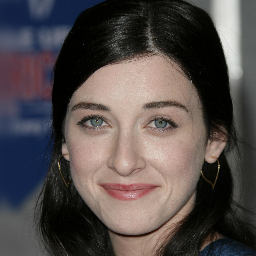

In [67]:
from tensorflow.keras import Model, Input, regularizers, utils
img_human = utils.load_img(face_images[0])
img_human

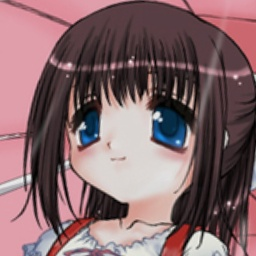

In [68]:
img_anime = utils.load_img(anime_images[0])
img_anime

In [69]:
all_images_anime = []
all_images_human = []

for i in tqdm(face_images):
    img = utils.load_img(i, target_size=(224,224,3))
    img = utils.img_to_array(img)
    
#     print("Before - ", img.shape)
    img = np.expand_dims(img,axis=0)
#     print("After - ", img.shape)
    
    all_images_human.append(img)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 95.72it/s]


In [70]:
for i in tqdm(anime_images):
    img = utils.load_img(i, target_size=(224,224,3))
    img = utils.img_to_array(img)
    
#     print("Before - ", img.shape)
    img = np.expand_dims(img,axis=0)
#     print("After - ", img.shape)
    all_images_anime.append(img)

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 209.15it/s]


In [71]:
def encode_image(img):
    feature_vector = model_new.predict(img)
    
#     feature_vector = feature_vector.reshape((-1,))
    print(feature_vector.shape)
    return feature_vector

In [72]:
start_time = time()
encoding_human =[]

for ix,img in enumerate(all_images_human):
    encoding_human.append(encode_image(img))
    print("Encoding in Progress Time step %d "%ix)

# encoding_human = model_new.predict(all_images_human)

end_time = time()
print("Total Time Taken :",end_time-start_time)

1/1 [==============================] - 0s 132ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 0 
1/1 [==============================] - 0s 83ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 1 
1/1 [==============================] - 0s 81ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 2 
1/1 [==============================] - 0s 85ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 3 
1/1 [==============================] - 0s 86ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 4 
1/1 [==============================] - 0s 86ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 5 
1/1 [==============================] - 0s 87ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 6 
1/1 [==============================] - 0s 86ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 7 
1/1 [==============================] - 0s 89ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 8 
1/1 [==============================] - 0s 88ms/step
(1, 28, 28, 512)
Enc

1/1 [==============================] - 0s 86ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 79 
1/1 [==============================] - 0s 85ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 80 
1/1 [==============================] - 0s 107ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 81 
1/1 [==============================] - 0s 93ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 82 
1/1 [==============================] - 0s 91ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 83 
1/1 [==============================] - 0s 97ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 84 
1/1 [==============================] - 0s 89ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 85 
1/1 [==============================] - 0s 86ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 86 
1/1 [==============================] - 0s 87ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 87 
1/1 [==============================] - 0s 84ms/step
(1, 28, 28,

In [73]:
!mkdir saved

A subdirectory or file saved already exists.


In [74]:
with open("saved/encoded_human_features.pkl","wb") as f:
    pickle.dump(encoding_human,f)

In [75]:
start_time = time()
encoding_anime =[]

for ix,img in enumerate(all_images_anime):
    encoding_anime.append(encode_image(img))
    print("Encoding in Progress Time step %d "%ix)

end_time = time()
print("Total Time Taken :",end_time-start_time)

1/1 [==============================] - 0s 82ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 0 
1/1 [==============================] - 0s 82ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 1 
1/1 [==============================] - 0s 84ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 2 
1/1 [==============================] - 0s 92ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 3 
1/1 [==============================] - 0s 89ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 4 
1/1 [==============================] - 0s 89ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 5 
1/1 [==============================] - 0s 87ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 6 
1/1 [==============================] - 0s 90ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 7 
1/1 [==============================] - 0s 88ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 8 
1/1 [==============================] - 0s 90ms/step
(1, 28, 28, 512)
Enco

1/1 [==============================] - 0s 97ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 79 
1/1 [==============================] - 0s 105ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 80 
1/1 [==============================] - 0s 95ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 81 
1/1 [==============================] - 0s 89ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 82 
1/1 [==============================] - 0s 93ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 83 
1/1 [==============================] - 0s 90ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 84 
1/1 [==============================] - 0s 92ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 85 
1/1 [==============================] - 0s 99ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 86 
1/1 [==============================] - 0s 104ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 87 
1/1 [==============================] - 0s 98ms/step
(1, 28, 28

In [76]:
with open("saved/encoded_anime_features.pkl","wb") as f:
    pickle.dump(encoding_anime,f)

In [77]:
print(encoding_anime[0])
print(encoding_anime[0].shape)

[[[[   0.       1695.193       0.       ...  859.3678    295.0196
       0.      ]
   [   0.       2626.6355   1764.6787   ...  649.84973     0.
       0.      ]
   [1280.5396   2789.6614   1977.011    ...  930.39325     0.
       0.      ]
   ...
   [   0.        133.33232     0.       ...    0.          0.
       0.      ]
   [   0.        471.6353      0.       ...    0.          0.
       0.      ]
   [ 543.12744   577.315    1135.5707   ...  289.73505   351.74118
       0.      ]]

  [[1310.142     847.9838   1135.1982   ... 1037.1882   2285.4944
     912.95056 ]
   [   0.       1428.5614   4482.9634   ...  258.154    2430.6692
     109.33724 ]
   [ 630.89185  2251.1238   4873.8354   ...   45.868572 1503.7262
     131.62524 ]
   ...
   [   0.       1393.8186   2470.3298   ...    0.       1348.2482
       0.      ]
   [   0.       2209.4233   2950.992    ...  834.59094  1539.8208
       0.      ]
   [2586.1687   2103.6382   4186.8706   ... 1807.6403   2045.1193
       0.      ]]

 

In [78]:
def get_mean_std(x, epsilon=1e-5):

    # Compute the mean and standard deviation of a tensor.
    mean = np.mean(x)
    standard_deviation = np.std(x)
    return mean, standard_deviation

In [79]:
def ada_in(style, content):
    """Computes the AdaIn feature map.

    Args:
        style: The style feature map.
        content: The content feature map.

    Returns:
        The AdaIN feature map.
    """
    content_mean, content_std = get_mean_std(content)
    style_mean, style_std = get_mean_std(style)
    t = style_std * (content - content_mean) / content_std + style_mean
    return t

In [80]:
#example
res = ada_in(encoding_anime[0], encoding_human[0])
# print(res)
print(res.shape)
print(res[0].shape)

(1, 28, 28, 512)
(28, 28, 512)


In [81]:
#decoder part

In [82]:
x0 = Input(shape = (28, 28, 512))
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x0)
x2 = UpSampling2D((2, 2))(x1)

x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
x4 = Conv2D(256, (3, 3), activation='relu', padding='same')(x3)
x5 = Conv2D(256, (3, 3), activation='relu', padding='same')(x4)
x6 = Conv2D(128, (3, 3), activation='relu', padding='same')(x5)
x7 = UpSampling2D((2, 2))(x6)

x8 = Conv2D(128, (3, 3), activation='relu', padding='same')(x7)
x9 = Conv2D(64, (3, 3), activation='relu', padding='same')(x8)
x10 = UpSampling2D((2, 2))(x9)

x11 = Conv2D(64, (3, 3), activation='relu', padding='same')(x10)
x12 = Conv2D(3, (3, 3), activation='relu', padding='same')(x11)

In [83]:
decoder = Model(x0, x12)
decoder.compile(optimizer='adam', loss='mse')
decoder

In [84]:
print(decoder.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 512)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 256)       1179904   
                                                                 
 up_sampling2d_3 (UpSampling  (None, 56, 56, 256)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 56, 56, 256)       590080    
                                                                 
 conv2d_11 (Conv2D)          (None, 56, 56, 256)       590080    
                                                                 
 conv2d_12 (Conv2D)          (None, 56, 56, 256)       590080    
                                                           

In [85]:
print(encoding_anime[0].shape)
print(res.shape)
print(all_images_anime[0].shape)
decoder.fit(res, all_images_anime[0], epochs=10)

(1, 28, 28, 512)
(1, 28, 28, 512)
(1, 224, 224, 3)
Epoch 1/10
1/1 [==============================] - 1s 993ms/step - loss: 10773.4824
Epoch 2/10
1/1 [==============================] - 1s 523ms/step - loss: 11652894.0000
Epoch 3/10
1/1 [==============================] - 1s 543ms/step - loss: 15206.5205
Epoch 4/10
1/1 [==============================] - 1s 502ms/step - loss: 14060.5361
Epoch 5/10
1/1 [==============================] - 0s 482ms/step - loss: 16664.9727
Epoch 6/10
1/1 [==============================] - 1s 523ms/step - loss: 12355.1465
Epoch 7/10
1/1 [==============================] - 1s 508ms/step - loss: 15829.5654
Epoch 8/10
1/1 [==============================] - 1s 509ms/step - loss: 614373.9375
Epoch 9/10
1/1 [==============================] - 1s 515ms/step - loss: 12931.9463
Epoch 10/10
1/1 [==============================] - 1s 531ms/step - loss: 17697.4922


In [86]:
predictions = decoder.predict(res)
print(predictions.shape)

1/1 [==============================] - 0s 144ms/step
(1, 224, 224, 3)


In [88]:
# tmp = predictions[0]
# print(tmp.shape)
# img = utils.array_to_img(tmp)
# plt.imshow(img)
# plt.show()

In [89]:
start_time = time()
encoding_combined = []

for ix,img in enumerate(encoding_anime):
    encoding_combined.append(ada_in(encoding_anime[ix], encoding_human[ix]))
    print("Encoding in Progress Time step %d "%ix)

end_time = time()
print("Total Time Taken :",end_time-start_time)

Encoding in Progress Time step 0 
Encoding in Progress Time step 1 
Encoding in Progress Time step 2 
Encoding in Progress Time step 3 
Encoding in Progress Time step 4 
Encoding in Progress Time step 5 
Encoding in Progress Time step 6 
Encoding in Progress Time step 7 
Encoding in Progress Time step 8 
Encoding in Progress Time step 9 
Encoding in Progress Time step 10 
Encoding in Progress Time step 11 
Encoding in Progress Time step 12 
Encoding in Progress Time step 13 
Encoding in Progress Time step 14 
Encoding in Progress Time step 15 
Encoding in Progress Time step 16 
Encoding in Progress Time step 17 
Encoding in Progress Time step 18 
Encoding in Progress Time step 19 
Encoding in Progress Time step 20 
Encoding in Progress Time step 21 
Encoding in Progress Time step 22 
Encoding in Progress Time step 23 
Encoding in Progress Time step 24 
Encoding in Progress Time step 25 
Encoding in Progress Time step 26 
Encoding in Progress Time step 27 
Encoding in Progress Time step

In [90]:
# encoding_list = list(encoding_combined.values())
desired_ans = []
for i in tqdm(all_images_anime):
    desired_ans.append(i[0])
#     print(i.shape)
#     print(i[0].shape)

desired_ans[0].shape
all_images_anime[0].shape

100%|████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<?, ?it/s]


(1, 224, 224, 3)

In [91]:
# print(len(encoding_list))
print(len(desired_ans))
# encoding_list[0].shape

100


In [100]:
#Problem in this part.
#unable to fit somehow....
# we are directly predicting the results without fitting the data...
# as a result the results are random images.

start_time = time()

for ind,img in enumerate(encoding_combined):
    print("Encoding in Progress Time step %d "%ind)
    decoder.fit(encoding_combined[ind], all_images_anime[ind], epochs=50)


end_time = time()
print("Total Time Taken :",end_time-start_time)


Encoding in Progress Time step 0 
Epoch 1/50
1/1 [==============================] - 1s 528ms/step - loss: 8649.6494
Epoch 2/50
1/1 [==============================] - 1s 544ms/step - loss: 8521.3291
Epoch 3/50
1/1 [==============================] - 1s 529ms/step - loss: 8480.1777
Epoch 4/50
1/1 [==============================] - 1s 632ms/step - loss: 8508.9287
Epoch 5/50
1/1 [==============================] - 1s 571ms/step - loss: 8543.8301
Epoch 6/50
1/1 [==============================] - 1s 560ms/step - loss: 8533.0674
Epoch 7/50
1/1 [==============================] - 0s 498ms/step - loss: 8465.7773
Epoch 8/50
1/1 [==============================] - 1s 543ms/step - loss: 8367.4902
Epoch 9/50
1/1 [==============================] - 1s 501ms/step - loss: 8275.3779
Epoch 10/50
1/1 [==============================] - 1s 528ms/step - loss: 8202.9590
Epoch 11/50
1/1 [==============================] - 0s 494ms/step - loss: 8165.6392
Epoch 12/50
1/1 [==============================] - 1s 621ms/st

1/1 [==============================] - 1s 640ms/step - loss: 12045.2598
Epoch 49/50
1/1 [==============================] - 1s 632ms/step - loss: 12032.4863
Epoch 50/50
1/1 [==============================] - 1s 687ms/step - loss: 12016.3906
Encoding in Progress Time step 2 
Epoch 1/50
1/1 [==============================] - 1s 544ms/step - loss: 11880.1279
Epoch 2/50
1/1 [==============================] - 1s 645ms/step - loss: 11406.1992
Epoch 3/50
1/1 [==============================] - 1s 651ms/step - loss: 11437.2539
Epoch 4/50
1/1 [==============================] - 1s 634ms/step - loss: 10936.5430
Epoch 5/50
1/1 [==============================] - 1s 654ms/step - loss: 10951.8447
Epoch 6/50
1/1 [==============================] - 1s 640ms/step - loss: 10863.6611
Epoch 7/50
1/1 [==============================] - 1s 576ms/step - loss: 10599.9570
Epoch 8/50
1/1 [==============================] - 1s 554ms/step - loss: 10338.0527
Epoch 9/50
1/1 [==============================] - 1s 535ms/ste

1/1 [==============================] - 0s 500ms/step - loss: 23082.1445
Epoch 46/50
1/1 [==============================] - 1s 521ms/step - loss: 23070.1152
Epoch 47/50
1/1 [==============================] - 1s 530ms/step - loss: 23063.0762
Epoch 48/50
1/1 [==============================] - 1s 561ms/step - loss: 23048.1680
Epoch 49/50
1/1 [==============================] - 1s 541ms/step - loss: 23039.5918
Epoch 50/50
1/1 [==============================] - 1s 524ms/step - loss: 23033.6016
Encoding in Progress Time step 4 
Epoch 1/50
1/1 [==============================] - 1s 539ms/step - loss: 22741.4395
Epoch 2/50
1/1 [==============================] - 1s 533ms/step - loss: 21845.2852
Epoch 3/50
1/1 [==============================] - 1s 502ms/step - loss: 22159.7832
Epoch 4/50
1/1 [==============================] - 1s 525ms/step - loss: 21746.7344
Epoch 5/50
1/1 [==============================] - 1s 526ms/step - loss: 21452.3750
Epoch 6/50
1/1 [==============================] - 1s 535ms/

1/1 [==============================] - 1s 532ms/step - loss: 11962.9424
Epoch 43/50
1/1 [==============================] - 1s 534ms/step - loss: 11963.7139
Epoch 44/50
1/1 [==============================] - 1s 530ms/step - loss: 11947.6348
Epoch 45/50
1/1 [==============================] - 1s 535ms/step - loss: 11936.6914
Epoch 46/50
1/1 [==============================] - 0s 494ms/step - loss: 11936.1377
Epoch 47/50
1/1 [==============================] - 1s 527ms/step - loss: 11926.0459
Epoch 48/50
1/1 [==============================] - 1s 515ms/step - loss: 11915.5010
Epoch 49/50
1/1 [==============================] - 1s 528ms/step - loss: 11911.2754
Epoch 50/50
1/1 [==============================] - 1s 515ms/step - loss: 11897.3594
Encoding in Progress Time step 6 
Epoch 1/50
1/1 [==============================] - 1s 510ms/step - loss: 29773.1738
Epoch 2/50
1/1 [==============================] - 1s 528ms/step - loss: 29039.0723
Epoch 3/50
1/1 [==============================] - 1s 525

1/1 [==============================] - 1s 537ms/step - loss: 11160.6797
Epoch 40/50
1/1 [==============================] - 1s 510ms/step - loss: 11142.0293
Epoch 41/50
1/1 [==============================] - 1s 510ms/step - loss: 11127.6924
Epoch 42/50
1/1 [==============================] - 1s 530ms/step - loss: 11112.3174
Epoch 43/50
1/1 [==============================] - 1s 524ms/step - loss: 11097.4287
Epoch 44/50
1/1 [==============================] - 1s 506ms/step - loss: 11085.6836
Epoch 45/50
1/1 [==============================] - 1s 505ms/step - loss: 11071.2461
Epoch 46/50
1/1 [==============================] - 1s 510ms/step - loss: 11059.7266
Epoch 47/50
1/1 [==============================] - 1s 519ms/step - loss: 11050.5928
Epoch 48/50
1/1 [==============================] - 1s 512ms/step - loss: 11039.1123
Epoch 49/50
1/1 [==============================] - 1s 517ms/step - loss: 11030.8672
Epoch 50/50
1/1 [==============================] - 1s 519ms/step - loss: 11023.2070
Enco

1/1 [==============================] - 1s 527ms/step - loss: 21405.7812
Epoch 37/50
1/1 [==============================] - 1s 507ms/step - loss: 21387.6621
Epoch 38/50
1/1 [==============================] - 1s 538ms/step - loss: 21372.7070
Epoch 39/50
1/1 [==============================] - 1s 516ms/step - loss: 21353.9492
Epoch 40/50
1/1 [==============================] - 1s 513ms/step - loss: 21338.8047
Epoch 41/50
1/1 [==============================] - 1s 524ms/step - loss: 21322.9629
Epoch 42/50
1/1 [==============================] - 1s 521ms/step - loss: 21305.7266
Epoch 43/50
1/1 [==============================] - 1s 513ms/step - loss: 21290.1387
Epoch 44/50
1/1 [==============================] - 1s 514ms/step - loss: 21271.3828
Epoch 45/50
1/1 [==============================] - 1s 514ms/step - loss: 21256.7012
Epoch 46/50
1/1 [==============================] - 1s 516ms/step - loss: 21237.4199
Epoch 47/50
1/1 [==============================] - 1s 532ms/step - loss: 21218.4551
Epoc

1/1 [==============================] - 1s 510ms/step - loss: 37673.7422
Epoch 34/50
1/1 [==============================] - 1s 513ms/step - loss: 36949.4883
Epoch 35/50
1/1 [==============================] - 1s 525ms/step - loss: 36231.4180
Epoch 36/50
1/1 [==============================] - 1s 523ms/step - loss: 35524.5938
Epoch 37/50
1/1 [==============================] - 1s 531ms/step - loss: 34353.6836
Epoch 38/50
1/1 [==============================] - 1s 528ms/step - loss: 27871.1680
Epoch 39/50
1/1 [==============================] - 1s 508ms/step - loss: 27610.7402
Epoch 40/50
1/1 [==============================] - 1s 528ms/step - loss: 26599.4844
Epoch 41/50
1/1 [==============================] - 1s 521ms/step - loss: 24464.9941
Epoch 42/50
1/1 [==============================] - 1s 550ms/step - loss: 20991.9902
Epoch 43/50
1/1 [==============================] - 1s 506ms/step - loss: 28630.0762
Epoch 44/50
1/1 [==============================] - 1s 522ms/step - loss: 30161.7402
Epoc

1/1 [==============================] - 1s 503ms/step - loss: 24914.4531
Epoch 31/50
1/1 [==============================] - 1s 533ms/step - loss: 24907.5508
Epoch 32/50
1/1 [==============================] - 1s 524ms/step - loss: 24898.5254
Epoch 33/50
1/1 [==============================] - 1s 516ms/step - loss: 24895.4688
Epoch 34/50
1/1 [==============================] - 1s 535ms/step - loss: 24888.7402
Epoch 35/50
1/1 [==============================] - 1s 538ms/step - loss: 24882.5605
Epoch 36/50
1/1 [==============================] - 1s 513ms/step - loss: 24877.8164
Epoch 37/50
1/1 [==============================] - 1s 544ms/step - loss: 24868.4805
Epoch 38/50
1/1 [==============================] - 1s 515ms/step - loss: 24863.3574
Epoch 39/50
1/1 [==============================] - 1s 510ms/step - loss: 24857.5664
Epoch 40/50
1/1 [==============================] - 1s 524ms/step - loss: 24851.2266
Epoch 41/50
1/1 [==============================] - 1s 517ms/step - loss: 24847.8945
Epoc

1/1 [==============================] - 1s 516ms/step - loss: 26429.2695
Epoch 28/50
1/1 [==============================] - 1s 535ms/step - loss: 26393.8145
Epoch 29/50
1/1 [==============================] - 1s 532ms/step - loss: 26362.8516
Epoch 30/50
1/1 [==============================] - 1s 529ms/step - loss: 26342.4062
Epoch 31/50
1/1 [==============================] - 1s 525ms/step - loss: 26295.0098
Epoch 32/50
1/1 [==============================] - 1s 516ms/step - loss: 26249.4727
Epoch 33/50
1/1 [==============================] - 1s 541ms/step - loss: 26219.0430
Epoch 34/50
1/1 [==============================] - 1s 533ms/step - loss: 26184.0195
Epoch 35/50
1/1 [==============================] - 1s 518ms/step - loss: 26159.0684
Epoch 36/50
1/1 [==============================] - 1s 500ms/step - loss: 26144.3613
Epoch 37/50
1/1 [==============================] - 1s 508ms/step - loss: 26114.3418
Epoch 38/50
1/1 [==============================] - 1s 523ms/step - loss: 26085.4922
Epoc

1/1 [==============================] - 1s 518ms/step - loss: 27031.6895
Epoch 25/50
1/1 [==============================] - 0s 498ms/step - loss: 26691.9102
Epoch 26/50
1/1 [==============================] - 1s 523ms/step - loss: 26573.9902
Epoch 27/50
1/1 [==============================] - 1s 518ms/step - loss: 26828.6504
Epoch 28/50
1/1 [==============================] - 1s 515ms/step - loss: 26493.8477
Epoch 29/50
1/1 [==============================] - 1s 532ms/step - loss: 26366.3223
Epoch 30/50
1/1 [==============================] - 1s 544ms/step - loss: 26450.0723
Epoch 31/50
1/1 [==============================] - 1s 545ms/step - loss: 26376.6680
Epoch 32/50
1/1 [==============================] - 1s 513ms/step - loss: 26216.8555
Epoch 33/50
1/1 [==============================] - 1s 540ms/step - loss: 26210.0410
Epoch 34/50
1/1 [==============================] - 1s 524ms/step - loss: 26236.8750
Epoch 35/50
1/1 [==============================] - 1s 516ms/step - loss: 26104.5762
Epoc

1/1 [==============================] - 1s 516ms/step - loss: 24406.9062
Epoch 22/50
1/1 [==============================] - 1s 533ms/step - loss: 24386.6562
Epoch 23/50
1/1 [==============================] - 1s 524ms/step - loss: 24377.9688
Epoch 24/50
1/1 [==============================] - 1s 508ms/step - loss: 24355.7969
Epoch 25/50
1/1 [==============================] - 1s 534ms/step - loss: 24341.4492
Epoch 26/50
1/1 [==============================] - 1s 523ms/step - loss: 24326.8945
Epoch 27/50
1/1 [==============================] - 1s 544ms/step - loss: 24307.7266
Epoch 28/50
1/1 [==============================] - 1s 531ms/step - loss: 24296.1094
Epoch 29/50
1/1 [==============================] - 1s 519ms/step - loss: 24282.2812
Epoch 30/50
1/1 [==============================] - 1s 512ms/step - loss: 24271.6074
Epoch 31/50
1/1 [==============================] - 1s 518ms/step - loss: 24259.8887
Epoch 32/50
1/1 [==============================] - 1s 521ms/step - loss: 24244.9023
Epoc

1/1 [==============================] - 1s 504ms/step - loss: 29152.4609
Epoch 19/50
1/1 [==============================] - 1s 533ms/step - loss: 29202.4902
Epoch 20/50
1/1 [==============================] - 1s 514ms/step - loss: 29140.9609
Epoch 21/50
1/1 [==============================] - 1s 527ms/step - loss: 29127.0020
Epoch 22/50
1/1 [==============================] - 1s 504ms/step - loss: 29116.3320
Epoch 23/50
1/1 [==============================] - 1s 518ms/step - loss: 29058.9746
Epoch 24/50
1/1 [==============================] - 1s 521ms/step - loss: 29075.9023
Epoch 25/50
1/1 [==============================] - 1s 509ms/step - loss: 29022.8828
Epoch 26/50
1/1 [==============================] - 1s 521ms/step - loss: 29031.0859
Epoch 27/50
1/1 [==============================] - 1s 520ms/step - loss: 28997.9023
Epoch 28/50
1/1 [==============================] - 1s 513ms/step - loss: 28984.9531
Epoch 29/50
1/1 [==============================] - 1s 513ms/step - loss: 28979.4414
Epoc

1/1 [==============================] - 1s 510ms/step - loss: 20261.6562
Epoch 16/50
1/1 [==============================] - 1s 534ms/step - loss: 20235.1895
Epoch 17/50
1/1 [==============================] - 1s 529ms/step - loss: 20202.4668
Epoch 18/50
1/1 [==============================] - 1s 527ms/step - loss: 20166.5645
Epoch 19/50
1/1 [==============================] - 1s 510ms/step - loss: 20129.4395
Epoch 20/50
1/1 [==============================] - 1s 530ms/step - loss: 20097.3398
Epoch 21/50
1/1 [==============================] - 1s 525ms/step - loss: 20071.9004
Epoch 22/50
1/1 [==============================] - 1s 522ms/step - loss: 20050.4766
Epoch 23/50
1/1 [==============================] - 1s 537ms/step - loss: 20029.7676
Epoch 24/50
1/1 [==============================] - 1s 509ms/step - loss: 20005.7441
Epoch 25/50
1/1 [==============================] - 1s 518ms/step - loss: 19984.0742
Epoch 26/50
1/1 [==============================] - 1s 520ms/step - loss: 19965.5039
Epoc

1/1 [==============================] - 1s 514ms/step - loss: 37301.9336
Epoch 13/50
1/1 [==============================] - 1s 532ms/step - loss: 37282.5000
Epoch 14/50
1/1 [==============================] - 1s 509ms/step - loss: 37261.5938
Epoch 15/50
1/1 [==============================] - 1s 513ms/step - loss: 37247.7695
Epoch 16/50
1/1 [==============================] - 1s 526ms/step - loss: 37229.9219
Epoch 17/50
1/1 [==============================] - 1s 535ms/step - loss: 37217.0938
Epoch 18/50
1/1 [==============================] - 1s 518ms/step - loss: 37199.6133
Epoch 19/50
1/1 [==============================] - 1s 534ms/step - loss: 37187.1367
Epoch 20/50
1/1 [==============================] - 1s 518ms/step - loss: 37174.6523
Epoch 21/50
1/1 [==============================] - 1s 511ms/step - loss: 37160.8047
Epoch 22/50
1/1 [==============================] - 1s 522ms/step - loss: 37148.8945
Epoch 23/50
1/1 [==============================] - 1s 508ms/step - loss: 37135.0039
Epoc

1/1 [==============================] - 1s 542ms/step - loss: 31645.3672
Epoch 10/50
1/1 [==============================] - 1s 525ms/step - loss: 31622.6523
Epoch 11/50
1/1 [==============================] - 1s 527ms/step - loss: 31596.7754
Epoch 12/50
1/1 [==============================] - 1s 507ms/step - loss: 31562.6602
Epoch 13/50
1/1 [==============================] - 1s 522ms/step - loss: 31528.9082
Epoch 14/50
1/1 [==============================] - 1s 512ms/step - loss: 31499.9277
Epoch 15/50
1/1 [==============================] - 1s 505ms/step - loss: 31473.7832
Epoch 16/50
1/1 [==============================] - 1s 514ms/step - loss: 31450.8477
Epoch 17/50
1/1 [==============================] - 1s 611ms/step - loss: 31431.6934
Epoch 18/50
1/1 [==============================] - 1s 604ms/step - loss: 31415.2637
Epoch 19/50
1/1 [==============================] - 1s 574ms/step - loss: 31400.2695
Epoch 20/50
1/1 [==============================] - 1s 504ms/step - loss: 31385.6758
Epoc

1/1 [==============================] - 1s 536ms/step - loss: 22066.5098
Epoch 7/50
1/1 [==============================] - 1s 523ms/step - loss: 22014.1680
Epoch 8/50
1/1 [==============================] - 1s 561ms/step - loss: 21765.0195
Epoch 9/50
1/1 [==============================] - 1s 539ms/step - loss: 21330.5723
Epoch 10/50
1/1 [==============================] - 1s 520ms/step - loss: 20743.8184
Epoch 11/50
1/1 [==============================] - 1s 530ms/step - loss: 20115.5996
Epoch 12/50
1/1 [==============================] - 1s 528ms/step - loss: 19769.2559
Epoch 13/50
1/1 [==============================] - 1s 524ms/step - loss: 20218.1055
Epoch 14/50
1/1 [==============================] - 1s 522ms/step - loss: 20733.1387
Epoch 15/50
1/1 [==============================] - 1s 533ms/step - loss: 20192.9648
Epoch 16/50
1/1 [==============================] - 1s 506ms/step - loss: 19732.1719
Epoch 17/50
1/1 [==============================] - 1s 527ms/step - loss: 19812.0762
Epoch 1

1/1 [==============================] - 1s 513ms/step - loss: 13003.8887
Epoch 4/50
1/1 [==============================] - 1s 516ms/step - loss: 12959.8535
Epoch 5/50
1/1 [==============================] - 1s 514ms/step - loss: 12927.6260
Epoch 6/50
1/1 [==============================] - 1s 532ms/step - loss: 12879.8096
Epoch 7/50
1/1 [==============================] - 1s 520ms/step - loss: 12816.1807
Epoch 8/50
1/1 [==============================] - 1s 504ms/step - loss: 12768.2656
Epoch 9/50
1/1 [==============================] - 0s 500ms/step - loss: 12740.4424
Epoch 10/50
1/1 [==============================] - 1s 538ms/step - loss: 12707.8242
Epoch 11/50
1/1 [==============================] - 1s 534ms/step - loss: 12669.5527
Epoch 12/50
1/1 [==============================] - 1s 509ms/step - loss: 12635.5781
Epoch 13/50
1/1 [==============================] - 1s 506ms/step - loss: 12611.0654
Epoch 14/50
1/1 [==============================] - 1s 510ms/step - loss: 12591.4717
Epoch 15/5

1/1 [==============================] - 1s 532ms/step - loss: 12104.3945
Encoding in Progress Time step 33 
Epoch 1/50
1/1 [==============================] - 1s 519ms/step - loss: 22948.9570
Epoch 2/50
1/1 [==============================] - 1s 518ms/step - loss: 22484.9746
Epoch 3/50
1/1 [==============================] - 1s 525ms/step - loss: 22030.8008
Epoch 4/50
1/1 [==============================] - 1s 516ms/step - loss: 21696.7363
Epoch 5/50
1/1 [==============================] - 1s 523ms/step - loss: 21574.2656
Epoch 6/50
1/1 [==============================] - 1s 517ms/step - loss: 21563.1426
Epoch 7/50
1/1 [==============================] - 1s 536ms/step - loss: 21494.1758
Epoch 8/50
1/1 [==============================] - 1s 543ms/step - loss: 21510.6992
Epoch 9/50
1/1 [==============================] - 1s 521ms/step - loss: 21475.3027
Epoch 10/50
1/1 [==============================] - 1s 524ms/step - loss: 21388.5684
Epoch 11/50
1/1 [==============================] - 1s 512ms/st

1/1 [==============================] - 1s 521ms/step - loss: 25327.9688
Epoch 48/50
1/1 [==============================] - 1s 528ms/step - loss: 25210.4062
Epoch 49/50
1/1 [==============================] - 1s 521ms/step - loss: 25180.0195
Epoch 50/50
1/1 [==============================] - 1s 523ms/step - loss: 24974.9023
Encoding in Progress Time step 35 
Epoch 1/50
1/1 [==============================] - 1s 530ms/step - loss: 34745.1523
Epoch 2/50
1/1 [==============================] - 1s 513ms/step - loss: 32831.0977
Epoch 3/50
1/1 [==============================] - 1s 524ms/step - loss: 33987.4727
Epoch 4/50
1/1 [==============================] - 1s 518ms/step - loss: 33688.0625
Epoch 5/50
1/1 [==============================] - 1s 518ms/step - loss: 32582.7773
Epoch 6/50
1/1 [==============================] - 1s 541ms/step - loss: 31127.4531
Epoch 7/50
1/1 [==============================] - 1s 549ms/step - loss: 48659.4688
Epoch 8/50
1/1 [==============================] - 1s 543ms/s

1/1 [==============================] - 1s 546ms/step - loss: 19729.6133
Epoch 45/50
1/1 [==============================] - 1s 549ms/step - loss: 19722.9805
Epoch 46/50
1/1 [==============================] - 1s 547ms/step - loss: 19722.2266
Epoch 47/50
1/1 [==============================] - 1s 529ms/step - loss: 19718.2285
Epoch 48/50
1/1 [==============================] - 1s 521ms/step - loss: 19707.8105
Epoch 49/50
1/1 [==============================] - 1s 539ms/step - loss: 19698.0293
Epoch 50/50
1/1 [==============================] - 1s 542ms/step - loss: 19693.5645
Encoding in Progress Time step 37 
Epoch 1/50
1/1 [==============================] - 1s 536ms/step - loss: 26210.2480
Epoch 2/50
1/1 [==============================] - 1s 513ms/step - loss: 25401.1504
Epoch 3/50
1/1 [==============================] - 1s 569ms/step - loss: 25431.0020
Epoch 4/50
1/1 [==============================] - 1s 533ms/step - loss: 25755.6895
Epoch 5/50
1/1 [==============================] - 1s 555m

1/1 [==============================] - 1s 519ms/step - loss: 22929.9277
Epoch 42/50
1/1 [==============================] - 1s 537ms/step - loss: 22921.2852
Epoch 43/50
1/1 [==============================] - 1s 539ms/step - loss: 22912.5762
Epoch 44/50
1/1 [==============================] - 1s 544ms/step - loss: 22900.8613
Epoch 45/50
1/1 [==============================] - 1s 534ms/step - loss: 22891.1426
Epoch 46/50
1/1 [==============================] - 1s 526ms/step - loss: 22880.6113
Epoch 47/50
1/1 [==============================] - 1s 534ms/step - loss: 22870.5000
Epoch 48/50
1/1 [==============================] - 1s 510ms/step - loss: 22862.1230
Epoch 49/50
1/1 [==============================] - 1s 533ms/step - loss: 22851.2188
Epoch 50/50
1/1 [==============================] - 1s 540ms/step - loss: 22843.8242
Encoding in Progress Time step 39 
Epoch 1/50
1/1 [==============================] - 1s 513ms/step - loss: 21200.9238
Epoch 2/50
1/1 [==============================] - 1s 5

1/1 [==============================] - 1s 541ms/step - loss: 17705.5312
Epoch 39/50
1/1 [==============================] - 1s 548ms/step - loss: 17699.5449
Epoch 40/50
1/1 [==============================] - 1s 553ms/step - loss: 17680.8242
Epoch 41/50
1/1 [==============================] - 1s 530ms/step - loss: 17660.7695
Epoch 42/50
1/1 [==============================] - 1s 540ms/step - loss: 17669.5371
Epoch 43/50
1/1 [==============================] - 1s 569ms/step - loss: 17644.4141
Epoch 44/50
1/1 [==============================] - 1s 536ms/step - loss: 17628.5996
Epoch 45/50
1/1 [==============================] - 1s 527ms/step - loss: 17622.5742
Epoch 46/50
1/1 [==============================] - 1s 566ms/step - loss: 17614.9238
Epoch 47/50
1/1 [==============================] - 1s 525ms/step - loss: 17606.3418
Epoch 48/50
1/1 [==============================] - 1s 525ms/step - loss: 17601.5664
Epoch 49/50
1/1 [==============================] - 1s 530ms/step - loss: 17591.4199
Epoc

1/1 [==============================] - 1s 547ms/step - loss: 26747.2305
Epoch 36/50
1/1 [==============================] - 1s 532ms/step - loss: 26733.5469
Epoch 37/50
1/1 [==============================] - 1s 543ms/step - loss: 26721.1641
Epoch 38/50
1/1 [==============================] - 1s 556ms/step - loss: 26704.8848
Epoch 39/50
1/1 [==============================] - 1s 540ms/step - loss: 26690.5996
Epoch 40/50
1/1 [==============================] - 1s 557ms/step - loss: 26680.3809
Epoch 41/50
1/1 [==============================] - 1s 548ms/step - loss: 26668.1445
Epoch 42/50
1/1 [==============================] - 1s 532ms/step - loss: 26657.8477
Epoch 43/50
1/1 [==============================] - 1s 526ms/step - loss: 26650.0332
Epoch 44/50
1/1 [==============================] - 1s 528ms/step - loss: 26640.0605
Epoch 45/50
1/1 [==============================] - 1s 552ms/step - loss: 26630.6836
Epoch 46/50
1/1 [==============================] - 1s 540ms/step - loss: 26623.8984
Epoc

1/1 [==============================] - 1s 567ms/step - loss: 29117.4805
Epoch 33/50
1/1 [==============================] - 1s 540ms/step - loss: 29118.6719
Epoch 34/50
1/1 [==============================] - 1s 528ms/step - loss: 29091.0977
Epoch 35/50
1/1 [==============================] - 1s 540ms/step - loss: 29074.9102
Epoch 36/50
1/1 [==============================] - 1s 548ms/step - loss: 29083.5469
Epoch 37/50
1/1 [==============================] - 1s 535ms/step - loss: 29074.5273
Epoch 38/50
1/1 [==============================] - 1s 526ms/step - loss: 29053.7109
Epoch 39/50
1/1 [==============================] - 1s 537ms/step - loss: 29049.6016
Epoch 40/50
1/1 [==============================] - 1s 553ms/step - loss: 29051.3281
Epoch 41/50
1/1 [==============================] - 1s 537ms/step - loss: 29041.8574
Epoch 42/50
1/1 [==============================] - 1s 524ms/step - loss: 29028.4941
Epoch 43/50
1/1 [==============================] - 1s 554ms/step - loss: 29023.8145
Epoc

1/1 [==============================] - 1s 562ms/step - loss: 12204.9873
Epoch 30/50
1/1 [==============================] - 1s 549ms/step - loss: 12197.5635
Epoch 31/50
1/1 [==============================] - 1s 555ms/step - loss: 12197.7578
Epoch 32/50
1/1 [==============================] - 1s 549ms/step - loss: 12199.0137
Epoch 33/50
1/1 [==============================] - 1s 524ms/step - loss: 12195.3545
Epoch 34/50
1/1 [==============================] - 1s 550ms/step - loss: 12188.2471
Epoch 35/50
1/1 [==============================] - 1s 542ms/step - loss: 12183.1582
Epoch 36/50
1/1 [==============================] - 1s 553ms/step - loss: 12182.1094
Epoch 37/50
1/1 [==============================] - 1s 564ms/step - loss: 12182.0947
Epoch 38/50
1/1 [==============================] - 1s 550ms/step - loss: 12179.7842
Epoch 39/50
1/1 [==============================] - 1s 550ms/step - loss: 12174.7549
Epoch 40/50
1/1 [==============================] - 1s 547ms/step - loss: 12169.3369
Epoc

1/1 [==============================] - 1s 539ms/step - loss: 26965.4023
Epoch 27/50
1/1 [==============================] - 1s 550ms/step - loss: 26966.0391
Epoch 28/50
1/1 [==============================] - 1s 550ms/step - loss: 26925.2598
Epoch 29/50
1/1 [==============================] - 1s 536ms/step - loss: 26919.9902
Epoch 30/50
1/1 [==============================] - 1s 561ms/step - loss: 26916.3008
Epoch 31/50
1/1 [==============================] - 1s 524ms/step - loss: 26891.9805
Epoch 32/50
1/1 [==============================] - 1s 541ms/step - loss: 26889.5391
Epoch 33/50
1/1 [==============================] - 1s 552ms/step - loss: 26879.1641
Epoch 34/50
1/1 [==============================] - 1s 550ms/step - loss: 26857.1641
Epoch 35/50
1/1 [==============================] - 1s 539ms/step - loss: 26857.7695
Epoch 36/50
1/1 [==============================] - 1s 553ms/step - loss: 26851.8770
Epoch 37/50
1/1 [==============================] - 1s 545ms/step - loss: 26834.6855
Epoc

1/1 [==============================] - 1s 576ms/step - loss: 22109.3926
Epoch 24/50
1/1 [==============================] - 1s 557ms/step - loss: 22064.8086
Epoch 25/50
1/1 [==============================] - 1s 558ms/step - loss: 22076.3008
Epoch 26/50
1/1 [==============================] - 1s 569ms/step - loss: 22034.9590
Epoch 27/50
1/1 [==============================] - 1s 536ms/step - loss: 22018.6582
Epoch 28/50
1/1 [==============================] - 1s 563ms/step - loss: 22000.8418
Epoch 29/50
1/1 [==============================] - 1s 558ms/step - loss: 21963.1445
Epoch 30/50
1/1 [==============================] - 1s 557ms/step - loss: 21952.2246
Epoch 31/50
1/1 [==============================] - 1s 571ms/step - loss: 21931.7246
Epoch 32/50
1/1 [==============================] - 1s 552ms/step - loss: 21902.1895
Epoch 33/50
1/1 [==============================] - 1s 566ms/step - loss: 21892.9746
Epoch 34/50
1/1 [==============================] - 1s 549ms/step - loss: 21880.3477
Epoc

1/1 [==============================] - 1s 553ms/step - loss: 19599.5195
Epoch 21/50
1/1 [==============================] - 1s 545ms/step - loss: 19612.9258
Epoch 22/50
1/1 [==============================] - 1s 550ms/step - loss: 19665.8223
Epoch 23/50
1/1 [==============================] - 1s 576ms/step - loss: 19651.0957
Epoch 24/50
1/1 [==============================] - 1s 556ms/step - loss: 19572.4102
Epoch 25/50
1/1 [==============================] - 1s 578ms/step - loss: 19518.2207
Epoch 26/50
1/1 [==============================] - 1s 566ms/step - loss: 19540.4238
Epoch 27/50
1/1 [==============================] - 1s 572ms/step - loss: 19555.9180
Epoch 28/50
1/1 [==============================] - 1s 559ms/step - loss: 19511.5254
Epoch 29/50
1/1 [==============================] - 1s 568ms/step - loss: 19472.1699
Epoch 30/50
1/1 [==============================] - 1s 556ms/step - loss: 19473.7793
Epoch 31/50
1/1 [==============================] - 1s 564ms/step - loss: 19480.7852
Epoc

1/1 [==============================] - 1s 527ms/step - loss: 30605.5000
Epoch 18/50
1/1 [==============================] - 1s 533ms/step - loss: 30579.1270
Epoch 19/50
1/1 [==============================] - 1s 541ms/step - loss: 30562.8516
Epoch 20/50
1/1 [==============================] - 1s 530ms/step - loss: 30538.3809
Epoch 21/50
1/1 [==============================] - 1s 532ms/step - loss: 30508.0312
Epoch 22/50
1/1 [==============================] - 1s 540ms/step - loss: 30487.8770
Epoch 23/50
1/1 [==============================] - 1s 543ms/step - loss: 30472.4688
Epoch 24/50
1/1 [==============================] - 1s 544ms/step - loss: 30449.6484
Epoch 25/50
1/1 [==============================] - 1s 532ms/step - loss: 30425.6777
Epoch 26/50
1/1 [==============================] - 1s 546ms/step - loss: 30406.2031
Epoch 27/50
1/1 [==============================] - 1s 542ms/step - loss: 30387.2402
Epoch 28/50
1/1 [==============================] - 1s 542ms/step - loss: 30369.7559
Epoc

1/1 [==============================] - 1s 551ms/step - loss: 23359.1152
Epoch 15/50
1/1 [==============================] - 1s 555ms/step - loss: 23250.3477
Epoch 16/50
1/1 [==============================] - 1s 528ms/step - loss: 23163.9180
Epoch 17/50
1/1 [==============================] - 1s 537ms/step - loss: 23134.5938
Epoch 18/50
1/1 [==============================] - 1s 547ms/step - loss: 23086.7500
Epoch 19/50
1/1 [==============================] - 1s 525ms/step - loss: 22976.5781
Epoch 20/50
1/1 [==============================] - 1s 529ms/step - loss: 22874.7090
Epoch 21/50
1/1 [==============================] - 1s 548ms/step - loss: 22829.8984
Epoch 22/50
1/1 [==============================] - 1s 554ms/step - loss: 22804.5410
Epoch 23/50
1/1 [==============================] - 1s 548ms/step - loss: 22754.8066
Epoch 24/50
1/1 [==============================] - 1s 558ms/step - loss: 22686.7266
Epoch 25/50
1/1 [==============================] - 1s 548ms/step - loss: 22633.6426
Epoc

1/1 [==============================] - 1s 560ms/step - loss: 27931.9941
Epoch 12/50
1/1 [==============================] - 1s 548ms/step - loss: 27848.8613
Epoch 13/50
1/1 [==============================] - 1s 550ms/step - loss: 27742.3281
Epoch 14/50
1/1 [==============================] - 1s 522ms/step - loss: 27699.4590
Epoch 15/50
1/1 [==============================] - 1s 573ms/step - loss: 27632.7246
Epoch 16/50
1/1 [==============================] - 1s 546ms/step - loss: 27599.8164
Epoch 17/50
1/1 [==============================] - 1s 564ms/step - loss: 27536.1641
Epoch 18/50
1/1 [==============================] - 1s 547ms/step - loss: 27513.1523
Epoch 19/50
1/1 [==============================] - 1s 535ms/step - loss: 27474.4082
Epoch 20/50
1/1 [==============================] - 1s 560ms/step - loss: 27457.1191
Epoch 21/50
1/1 [==============================] - 1s 558ms/step - loss: 27421.0723
Epoch 22/50
1/1 [==============================] - 1s 557ms/step - loss: 27408.2363
Epoc

1/1 [==============================] - 1s 585ms/step - loss: 8346.9033
Epoch 9/50
1/1 [==============================] - 1s 578ms/step - loss: 8343.5654
Epoch 10/50
1/1 [==============================] - 1s 572ms/step - loss: 8329.7334
Epoch 11/50
1/1 [==============================] - 1s 576ms/step - loss: 8303.9443
Epoch 12/50
1/1 [==============================] - 1s 566ms/step - loss: 8266.1494
Epoch 13/50
1/1 [==============================] - 1s 541ms/step - loss: 8221.6992
Epoch 14/50
1/1 [==============================] - 1s 595ms/step - loss: 8177.8706
Epoch 15/50
1/1 [==============================] - 1s 567ms/step - loss: 8140.4458
Epoch 16/50
1/1 [==============================] - 1s 551ms/step - loss: 8115.2705
Epoch 17/50
1/1 [==============================] - 1s 561ms/step - loss: 8108.3354
Epoch 18/50
1/1 [==============================] - 1s 580ms/step - loss: 8116.2515
Epoch 19/50
1/1 [==============================] - 1s 570ms/step - loss: 8122.6909
Epoch 20/50
1/1 [

1/1 [==============================] - 1s 683ms/step - loss: 20362.8535
Epoch 6/50
1/1 [==============================] - 1s 641ms/step - loss: 20351.4277
Epoch 7/50
1/1 [==============================] - 1s 663ms/step - loss: 20341.2676
Epoch 8/50
1/1 [==============================] - 1s 631ms/step - loss: 20271.0938
Epoch 9/50
1/1 [==============================] - 1s 597ms/step - loss: 20231.1426
Epoch 10/50
1/1 [==============================] - 1s 604ms/step - loss: 20242.7695
Epoch 11/50
1/1 [==============================] - 1s 616ms/step - loss: 20185.7363
Epoch 12/50
1/1 [==============================] - 1s 826ms/step - loss: 20144.6094
Epoch 13/50
1/1 [==============================] - 1s 668ms/step - loss: 20144.0410
Epoch 14/50
1/1 [==============================] - 1s 748ms/step - loss: 20100.9746
Epoch 15/50
1/1 [==============================] - 1s 590ms/step - loss: 20094.9180
Epoch 16/50
1/1 [==============================] - 1s 596ms/step - loss: 20088.8438
Epoch 17

1/1 [==============================] - 1s 528ms/step - loss: 13049.2002
Epoch 3/50
1/1 [==============================] - 0s 495ms/step - loss: 12785.9463
Epoch 4/50
1/1 [==============================] - 1s 520ms/step - loss: 12834.8467
Epoch 5/50
1/1 [==============================] - 1s 533ms/step - loss: 12878.6826
Epoch 6/50
1/1 [==============================] - 1s 519ms/step - loss: 12787.8887
Epoch 7/50
1/1 [==============================] - 1s 534ms/step - loss: 12558.8877
Epoch 8/50
1/1 [==============================] - 1s 557ms/step - loss: 12330.5244
Epoch 9/50
1/1 [==============================] - 1s 545ms/step - loss: 12302.7861
Epoch 10/50
1/1 [==============================] - 1s 538ms/step - loss: 12410.6377
Epoch 11/50
1/1 [==============================] - 1s 535ms/step - loss: 12306.5449
Epoch 12/50
1/1 [==============================] - 1s 514ms/step - loss: 12183.9668
Epoch 13/50
1/1 [==============================] - 1s 571ms/step - loss: 12142.0869
Epoch 14/50

1/1 [==============================] - 1s 515ms/step - loss: 16879.5430
Epoch 50/50
1/1 [==============================] - 1s 508ms/step - loss: 16868.3496
Encoding in Progress Time step 66 
Epoch 1/50
1/1 [==============================] - 1s 509ms/step - loss: 28514.2676
Epoch 2/50
1/1 [==============================] - 1s 513ms/step - loss: 27714.9805
Epoch 3/50
1/1 [==============================] - 1s 508ms/step - loss: 27287.7930
Epoch 4/50
1/1 [==============================] - 1s 546ms/step - loss: 27548.3008
Epoch 5/50
1/1 [==============================] - 1s 520ms/step - loss: 26881.2246
Epoch 6/50
1/1 [==============================] - 1s 504ms/step - loss: 26851.2695
Epoch 7/50
1/1 [==============================] - 1s 538ms/step - loss: 26871.3516
Epoch 8/50
1/1 [==============================] - 1s 521ms/step - loss: 26634.2305
Epoch 9/50
1/1 [==============================] - 1s 505ms/step - loss: 26458.1309
Epoch 10/50
1/1 [==============================] - 1s 512ms/st

1/1 [==============================] - 1s 518ms/step - loss: 18247.2793
Epoch 47/50
1/1 [==============================] - 1s 510ms/step - loss: 18244.6094
Epoch 48/50
1/1 [==============================] - 1s 511ms/step - loss: 18241.8105
Epoch 49/50
1/1 [==============================] - 1s 527ms/step - loss: 18237.1309
Epoch 50/50
1/1 [==============================] - 0s 499ms/step - loss: 18233.0723
Encoding in Progress Time step 68 
Epoch 1/50
1/1 [==============================] - 1s 515ms/step - loss: 13261.0098
Epoch 2/50
1/1 [==============================] - 1s 512ms/step - loss: 13062.7734
Epoch 3/50
1/1 [==============================] - 1s 520ms/step - loss: 13001.0244
Epoch 4/50
1/1 [==============================] - 1s 507ms/step - loss: 13014.4717
Epoch 5/50
1/1 [==============================] - 1s 509ms/step - loss: 13015.4365
Epoch 6/50
1/1 [==============================] - 1s 507ms/step - loss: 12995.3291
Epoch 7/50
1/1 [==============================] - 1s 517ms/

1/1 [==============================] - 1s 540ms/step - loss: 21048.7637
Epoch 44/50
1/1 [==============================] - 1s 511ms/step - loss: 21042.6387
Epoch 45/50
1/1 [==============================] - 1s 507ms/step - loss: 21033.7637
Epoch 46/50
1/1 [==============================] - 1s 525ms/step - loss: 21031.4727
Epoch 47/50
1/1 [==============================] - 1s 524ms/step - loss: 21023.5703
Epoch 48/50
1/1 [==============================] - 1s 514ms/step - loss: 21018.4648
Epoch 49/50
1/1 [==============================] - 1s 502ms/step - loss: 21014.9512
Epoch 50/50
1/1 [==============================] - 1s 501ms/step - loss: 21007.7422
Encoding in Progress Time step 70 
Epoch 1/50
1/1 [==============================] - 1s 522ms/step - loss: 30683.8223
Epoch 2/50
1/1 [==============================] - 1s 501ms/step - loss: 30018.3027
Epoch 3/50
1/1 [==============================] - 1s 504ms/step - loss: 29438.8984
Epoch 4/50
1/1 [==============================] - 1s 527

1/1 [==============================] - 1s 506ms/step - loss: 16553.7402
Epoch 41/50
1/1 [==============================] - 1s 513ms/step - loss: 16536.7871
Epoch 42/50
1/1 [==============================] - 1s 518ms/step - loss: 16521.6387
Epoch 43/50
1/1 [==============================] - 1s 503ms/step - loss: 16506.7383
Epoch 44/50
1/1 [==============================] - 1s 511ms/step - loss: 16487.4355
Epoch 45/50
1/1 [==============================] - 1s 532ms/step - loss: 16464.6660
Epoch 46/50
1/1 [==============================] - 1s 515ms/step - loss: 16443.5684
Epoch 47/50
1/1 [==============================] - 1s 529ms/step - loss: 16427.0469
Epoch 48/50
1/1 [==============================] - 1s 503ms/step - loss: 16411.1992
Epoch 49/50
1/1 [==============================] - 1s 504ms/step - loss: 16392.8223
Epoch 50/50
1/1 [==============================] - 0s 500ms/step - loss: 16374.1348
Encoding in Progress Time step 72 
Epoch 1/50
1/1 [==============================] - 1s 

1/1 [==============================] - 1s 526ms/step - loss: 18413.3516
Epoch 38/50
1/1 [==============================] - 1s 518ms/step - loss: 18407.9434
Epoch 39/50
1/1 [==============================] - 1s 534ms/step - loss: 18399.9902
Epoch 40/50
1/1 [==============================] - 1s 531ms/step - loss: 18390.1895
Epoch 41/50
1/1 [==============================] - 1s 541ms/step - loss: 18381.9902
Epoch 42/50
1/1 [==============================] - 1s 502ms/step - loss: 18374.5566
Epoch 43/50
1/1 [==============================] - 1s 549ms/step - loss: 18366.6016
Epoch 44/50
1/1 [==============================] - 1s 554ms/step - loss: 18359.2188
Epoch 45/50
1/1 [==============================] - 1s 505ms/step - loss: 18352.0977
Epoch 46/50
1/1 [==============================] - 1s 518ms/step - loss: 18345.0605
Epoch 47/50
1/1 [==============================] - 1s 551ms/step - loss: 18339.7305
Epoch 48/50
1/1 [==============================] - 1s 524ms/step - loss: 18334.9023
Epoc

1/1 [==============================] - 1s 596ms/step - loss: 26012.6309
Epoch 35/50
1/1 [==============================] - 1s 573ms/step - loss: 26006.2148
Epoch 36/50
1/1 [==============================] - 1s 557ms/step - loss: 25993.9473
Epoch 37/50
1/1 [==============================] - 1s 610ms/step - loss: 25986.5020
Epoch 38/50
1/1 [==============================] - 1s 710ms/step - loss: 25979.1113
Epoch 39/50
1/1 [==============================] - 1s 674ms/step - loss: 25964.8730
Epoch 40/50
1/1 [==============================] - 1s 611ms/step - loss: 25956.3105
Epoch 41/50
1/1 [==============================] - 1s 577ms/step - loss: 25953.0391
Epoch 42/50
1/1 [==============================] - 1s 622ms/step - loss: 25943.5664
Epoch 43/50
1/1 [==============================] - 1s 569ms/step - loss: 25931.6758
Epoch 44/50
1/1 [==============================] - 1s 568ms/step - loss: 25925.3145
Epoch 45/50
1/1 [==============================] - 1s 553ms/step - loss: 25918.9023
Epoc

1/1 [==============================] - 1s 535ms/step - loss: 18341.9922
Epoch 32/50
1/1 [==============================] - 1s 554ms/step - loss: 18334.5195
Epoch 33/50
1/1 [==============================] - 1s 508ms/step - loss: 18321.6953
Epoch 34/50
1/1 [==============================] - 1s 528ms/step - loss: 18311.1738
Epoch 35/50
1/1 [==============================] - 1s 547ms/step - loss: 18306.0391
Epoch 36/50
1/1 [==============================] - 1s 540ms/step - loss: 18300.2930
Epoch 37/50
1/1 [==============================] - 1s 531ms/step - loss: 18289.7617
Epoch 38/50
1/1 [==============================] - 1s 537ms/step - loss: 18278.9980
Epoch 39/50
1/1 [==============================] - 1s 553ms/step - loss: 18271.6777
Epoch 40/50
1/1 [==============================] - 1s 526ms/step - loss: 18265.0156
Epoch 41/50
1/1 [==============================] - 1s 553ms/step - loss: 18255.7031
Epoch 42/50
1/1 [==============================] - 1s 537ms/step - loss: 18245.1660
Epoc

1/1 [==============================] - 1s 528ms/step - loss: 23231.2480
Epoch 29/50
1/1 [==============================] - 1s 512ms/step - loss: 23225.7754
Epoch 30/50
1/1 [==============================] - 1s 534ms/step - loss: 23212.7012
Epoch 31/50
1/1 [==============================] - 1s 556ms/step - loss: 23208.2148
Epoch 32/50
1/1 [==============================] - 1s 544ms/step - loss: 23207.2148
Epoch 33/50
1/1 [==============================] - 1s 536ms/step - loss: 23198.9805
Epoch 34/50
1/1 [==============================] - 1s 556ms/step - loss: 23190.0508
Epoch 35/50
1/1 [==============================] - 1s 530ms/step - loss: 23187.8340
Epoch 36/50
1/1 [==============================] - 1s 533ms/step - loss: 23184.5312
Epoch 37/50
1/1 [==============================] - 1s 537ms/step - loss: 23176.3828
Epoch 38/50
1/1 [==============================] - 1s 550ms/step - loss: 23171.2559
Epoch 39/50
1/1 [==============================] - 1s 539ms/step - loss: 23169.0391
Epoc

1/1 [==============================] - 1s 538ms/step - loss: 18782.1914
Epoch 26/50
1/1 [==============================] - 1s 577ms/step - loss: 18746.9355
Epoch 27/50
1/1 [==============================] - 1s 545ms/step - loss: 18720.5078
Epoch 28/50
1/1 [==============================] - 1s 537ms/step - loss: 18723.7422
Epoch 29/50
1/1 [==============================] - 1s 550ms/step - loss: 18723.7734
Epoch 30/50
1/1 [==============================] - 1s 544ms/step - loss: 18702.9004
Epoch 31/50
1/1 [==============================] - 1s 545ms/step - loss: 18682.4082
Epoch 32/50
1/1 [==============================] - 1s 562ms/step - loss: 18682.6113
Epoch 33/50
1/1 [==============================] - 1s 559ms/step - loss: 18684.1641
Epoch 34/50
1/1 [==============================] - 1s 546ms/step - loss: 18667.7969
Epoch 35/50
1/1 [==============================] - 1s 514ms/step - loss: 18653.8516
Epoch 36/50
1/1 [==============================] - 1s 554ms/step - loss: 18654.7109
Epoc

1/1 [==============================] - 1s 676ms/step - loss: 31198.9141
Epoch 23/50
1/1 [==============================] - 1s 580ms/step - loss: 31181.2930
Epoch 24/50
1/1 [==============================] - 1s 566ms/step - loss: 31163.7148
Epoch 25/50
1/1 [==============================] - 1s 558ms/step - loss: 31144.3926
Epoch 26/50
1/1 [==============================] - 1s 533ms/step - loss: 31122.6680
Epoch 27/50
1/1 [==============================] - 1s 567ms/step - loss: 31102.4473
Epoch 28/50
1/1 [==============================] - 1s 542ms/step - loss: 31082.2500
Epoch 29/50
1/1 [==============================] - 1s 528ms/step - loss: 31062.7441
Epoch 30/50
1/1 [==============================] - 1s 531ms/step - loss: 31045.5586
Epoch 31/50
1/1 [==============================] - 1s 529ms/step - loss: 31028.7031
Epoch 32/50
1/1 [==============================] - 1s 519ms/step - loss: 31012.7246
Epoch 33/50
1/1 [==============================] - 1s 517ms/step - loss: 30997.0605
Epoc

1/1 [==============================] - 1s 528ms/step - loss: 24663.7422
Epoch 20/50
1/1 [==============================] - 1s 512ms/step - loss: 24645.4355
Epoch 21/50
1/1 [==============================] - 1s 534ms/step - loss: 24652.4004
Epoch 22/50
1/1 [==============================] - 1s 511ms/step - loss: 24636.3848
Epoch 23/50
1/1 [==============================] - 1s 522ms/step - loss: 24637.9336
Epoch 24/50
1/1 [==============================] - 1s 528ms/step - loss: 24628.4941
Epoch 25/50
1/1 [==============================] - 1s 522ms/step - loss: 24620.7852
Epoch 26/50
1/1 [==============================] - 1s 540ms/step - loss: 24618.0273
Epoch 27/50
1/1 [==============================] - 1s 532ms/step - loss: 24608.4492
Epoch 28/50
1/1 [==============================] - 1s 545ms/step - loss: 24610.5059
Epoch 29/50
1/1 [==============================] - 1s 502ms/step - loss: 24602.9746
Epoch 30/50
1/1 [==============================] - 1s 527ms/step - loss: 24602.3613
Epoc

1/1 [==============================] - 1s 624ms/step - loss: 19678.6641
Epoch 17/50
1/1 [==============================] - 1s 547ms/step - loss: 19715.6426
Epoch 18/50
1/1 [==============================] - 1s 597ms/step - loss: 19687.3945
Epoch 19/50
1/1 [==============================] - 1s 611ms/step - loss: 19598.8691
Epoch 20/50
1/1 [==============================] - 1s 550ms/step - loss: 19605.6621
Epoch 21/50
1/1 [==============================] - 1s 551ms/step - loss: 19640.3984
Epoch 22/50
1/1 [==============================] - 1s 559ms/step - loss: 19575.1660
Epoch 23/50
1/1 [==============================] - 1s 669ms/step - loss: 19555.1348
Epoch 24/50
1/1 [==============================] - 1s 539ms/step - loss: 19575.8652
Epoch 25/50
1/1 [==============================] - 1s 546ms/step - loss: 19541.2539
Epoch 26/50
1/1 [==============================] - 1s 556ms/step - loss: 19495.1523
Epoch 27/50
1/1 [==============================] - 1s 588ms/step - loss: 19509.8496
Epoc

1/1 [==============================] - 1s 536ms/step - loss: 23043.4141
Epoch 14/50
1/1 [==============================] - 1s 515ms/step - loss: 22991.8418
Epoch 15/50
1/1 [==============================] - 1s 516ms/step - loss: 23030.1855
Epoch 16/50
1/1 [==============================] - 1s 543ms/step - loss: 23034.4082
Epoch 17/50
1/1 [==============================] - 1s 512ms/step - loss: 22937.3887
Epoch 18/50
1/1 [==============================] - 1s 545ms/step - loss: 22860.1719
Epoch 19/50
1/1 [==============================] - 1s 512ms/step - loss: 22838.8574
Epoch 20/50
1/1 [==============================] - 1s 540ms/step - loss: 22805.3887
Epoch 21/50
1/1 [==============================] - 1s 527ms/step - loss: 22726.2148
Epoch 22/50
1/1 [==============================] - 1s 531ms/step - loss: 22649.9844
Epoch 23/50
1/1 [==============================] - 1s 515ms/step - loss: 22659.4395
Epoch 24/50
1/1 [==============================] - 1s 531ms/step - loss: 22639.0742
Epoc

1/1 [==============================] - 1s 539ms/step - loss: 18586.5898
Epoch 11/50
1/1 [==============================] - 1s 538ms/step - loss: 18900.4512
Epoch 12/50
1/1 [==============================] - 1s 557ms/step - loss: 18543.2383
Epoch 13/50
1/1 [==============================] - 1s 538ms/step - loss: 18661.6152
Epoch 14/50
1/1 [==============================] - 1s 508ms/step - loss: 18592.8438
Epoch 15/50
1/1 [==============================] - 1s 573ms/step - loss: 18469.7227
Epoch 16/50
1/1 [==============================] - 1s 557ms/step - loss: 18549.8848
Epoch 17/50
1/1 [==============================] - 1s 559ms/step - loss: 18407.6699
Epoch 18/50
1/1 [==============================] - 1s 536ms/step - loss: 18384.3770
Epoch 19/50
1/1 [==============================] - 1s 530ms/step - loss: 18359.7070
Epoch 20/50
1/1 [==============================] - 1s 536ms/step - loss: 17818.7363
Epoch 21/50
1/1 [==============================] - 1s 550ms/step - loss: 14402.7402
Epoc

1/1 [==============================] - 1s 550ms/step - loss: 4257.3662
Epoch 9/50
1/1 [==============================] - 1s 542ms/step - loss: 4279.1357
Epoch 10/50
1/1 [==============================] - 1s 534ms/step - loss: 4212.7949
Epoch 11/50
1/1 [==============================] - 1s 525ms/step - loss: 3921.4492
Epoch 12/50
1/1 [==============================] - 1s 535ms/step - loss: 4199.7275
Epoch 13/50
1/1 [==============================] - 1s 524ms/step - loss: 3642.8977
Epoch 14/50
1/1 [==============================] - 1s 538ms/step - loss: 3868.7170
Epoch 15/50
1/1 [==============================] - 1s 543ms/step - loss: 3482.4023
Epoch 16/50
1/1 [==============================] - 1s 525ms/step - loss: 3686.8145
Epoch 17/50
1/1 [==============================] - 1s 549ms/step - loss: 3481.5000
Epoch 18/50
1/1 [==============================] - 1s 535ms/step - loss: 3444.2188
Epoch 19/50
1/1 [==============================] - 1s 542ms/step - loss: 3386.6990
Epoch 20/50
1/1 [

1/1 [==============================] - 1s 552ms/step - loss: 4374.6938
Epoch 7/50
1/1 [==============================] - 1s 538ms/step - loss: 4136.7817
Epoch 8/50
1/1 [==============================] - 1s 541ms/step - loss: 5340.8315
Epoch 9/50
1/1 [==============================] - 1s 547ms/step - loss: 8890.1592
Epoch 10/50
1/1 [==============================] - 1s 564ms/step - loss: 7299.4648
Epoch 11/50
1/1 [==============================] - 1s 543ms/step - loss: 4776.7227
Epoch 12/50
1/1 [==============================] - 1s 527ms/step - loss: 5777.5933
Epoch 13/50
1/1 [==============================] - 1s 540ms/step - loss: 5079.0933
Epoch 14/50
1/1 [==============================] - 1s 521ms/step - loss: 6503.4590
Epoch 15/50
1/1 [==============================] - 1s 535ms/step - loss: 3582.7666
Epoch 16/50
1/1 [==============================] - 1s 567ms/step - loss: 5962.7788
Epoch 17/50
1/1 [==============================] - 1s 543ms/step - loss: 3266.9087
Epoch 18/50
1/1 [==

1/1 [==============================] - 1s 510ms/step - loss: 3749.2622
Epoch 5/50
1/1 [==============================] - 1s 529ms/step - loss: 3689.0090
Epoch 6/50
1/1 [==============================] - 1s 534ms/step - loss: 3359.8999
Epoch 7/50
1/1 [==============================] - 1s 525ms/step - loss: 3297.4189
Epoch 8/50
1/1 [==============================] - 1s 520ms/step - loss: 3084.9434
Epoch 9/50
1/1 [==============================] - 1s 533ms/step - loss: 3034.9299
Epoch 10/50
1/1 [==============================] - 1s 518ms/step - loss: 2822.2878
Epoch 11/50
1/1 [==============================] - 1s 522ms/step - loss: 2704.6895
Epoch 12/50
1/1 [==============================] - 1s 521ms/step - loss: 2568.1575
Epoch 13/50
1/1 [==============================] - 1s 518ms/step - loss: 2493.8330
Epoch 14/50
1/1 [==============================] - 1s 526ms/step - loss: 2359.0173
Epoch 15/50
1/1 [==============================] - 1s 532ms/step - loss: 2295.7075
Epoch 16/50
1/1 [====

1/1 [==============================] - 1s 533ms/step - loss: 4643.7900
Epoch 3/50
1/1 [==============================] - 1s 544ms/step - loss: 4366.9736
Epoch 4/50
1/1 [==============================] - 1s 525ms/step - loss: 3917.9399
Epoch 5/50
1/1 [==============================] - 1s 519ms/step - loss: 3925.6965
Epoch 6/50
1/1 [==============================] - 1s 524ms/step - loss: 3635.6875
Epoch 7/50
1/1 [==============================] - 1s 524ms/step - loss: 3424.9312
Epoch 8/50
1/1 [==============================] - 1s 532ms/step - loss: 3134.0688
Epoch 9/50
1/1 [==============================] - 1s 521ms/step - loss: 3001.9888
Epoch 10/50
1/1 [==============================] - 1s 522ms/step - loss: 2895.1394
Epoch 11/50
1/1 [==============================] - 1s 526ms/step - loss: 2824.8533
Epoch 12/50
1/1 [==============================] - 1s 533ms/step - loss: 2675.2009
Epoch 13/50
1/1 [==============================] - 1s 522ms/step - loss: 2568.7874
Epoch 14/50
1/1 [======

In [101]:
# predictions = decoder.predict(encoding_combined)

predictions = []
for i in tqdm(encoding_combined):
    predictions.append(decoder.predict(i))

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 125ms/step


  1%|▊                                                                                 | 1/100 [00:00<00:15,  6.29it/s]

1/1 [==============================] - 0s 126ms/step


  2%|█▋                                                                                | 2/100 [00:00<00:15,  6.19it/s]

1/1 [==============================] - 0s 124ms/step


  3%|██▍                                                                               | 3/100 [00:00<00:15,  6.30it/s]

1/1 [==============================] - 0s 122ms/step


  4%|███▎                                                                              | 4/100 [00:00<00:15,  6.38it/s]

1/1 [==============================] - 0s 126ms/step


  5%|████                                                                              | 5/100 [00:00<00:14,  6.34it/s]

1/1 [==============================] - 0s 119ms/step


  6%|████▉                                                                             | 6/100 [00:00<00:14,  6.45it/s]

1/1 [==============================] - 0s 125ms/step


  7%|█████▋                                                                            | 7/100 [00:01<00:14,  6.43it/s]

1/1 [==============================] - 0s 123ms/step


  8%|██████▌                                                                           | 8/100 [00:01<00:14,  6.45it/s]

1/1 [==============================] - 0s 122ms/step


  9%|███████▍                                                                          | 9/100 [00:01<00:13,  6.54it/s]

1/1 [==============================] - 0s 119ms/step


 10%|████████                                                                         | 10/100 [00:01<00:13,  6.57it/s]

1/1 [==============================] - 0s 131ms/step


 11%|████████▉                                                                        | 11/100 [00:01<00:13,  6.47it/s]

1/1 [==============================] - 0s 118ms/step


 12%|█████████▋                                                                       | 12/100 [00:01<00:13,  6.49it/s]

1/1 [==============================] - 0s 119ms/step


 13%|██████████▌                                                                      | 13/100 [00:02<00:13,  6.55it/s]

1/1 [==============================] - 0s 122ms/step


 14%|███████████▎                                                                     | 14/100 [00:02<00:13,  6.54it/s]

1/1 [==============================] - 0s 120ms/step


 15%|████████████▏                                                                    | 15/100 [00:02<00:12,  6.57it/s]

1/1 [==============================] - 0s 121ms/step


 16%|████████████▉                                                                    | 16/100 [00:02<00:12,  6.64it/s]

1/1 [==============================] - 0s 123ms/step


 17%|█████████████▊                                                                   | 17/100 [00:02<00:12,  6.61it/s]

1/1 [==============================] - 0s 118ms/step


 18%|██████████████▌                                                                  | 18/100 [00:02<00:12,  6.65it/s]

1/1 [==============================] - 0s 120ms/step


 19%|███████████████▍                                                                 | 19/100 [00:02<00:12,  6.65it/s]

1/1 [==============================] - 0s 137ms/step


 20%|████████████████▏                                                                | 20/100 [00:03<00:12,  6.42it/s]

1/1 [==============================] - 0s 120ms/step


 21%|█████████████████                                                                | 21/100 [00:03<00:12,  6.43it/s]

1/1 [==============================] - 0s 117ms/step


 22%|█████████████████▊                                                               | 22/100 [00:03<00:11,  6.60it/s]

1/1 [==============================] - 0s 125ms/step


 23%|██████████████████▋                                                              | 23/100 [00:03<00:11,  6.61it/s]

1/1 [==============================] - 0s 132ms/step


 24%|███████████████████▍                                                             | 24/100 [00:03<00:11,  6.44it/s]

1/1 [==============================] - 0s 119ms/step


 25%|████████████████████▎                                                            | 25/100 [00:03<00:11,  6.55it/s]

1/1 [==============================] - 0s 120ms/step


 26%|█████████████████████                                                            | 26/100 [00:03<00:11,  6.58it/s]

1/1 [==============================] - 0s 129ms/step


 27%|█████████████████████▊                                                           | 27/100 [00:04<00:11,  6.52it/s]

1/1 [==============================] - 0s 134ms/step


 28%|██████████████████████▋                                                          | 28/100 [00:04<00:11,  6.38it/s]

1/1 [==============================] - 0s 121ms/step


 29%|███████████████████████▍                                                         | 29/100 [00:04<00:11,  6.44it/s]

1/1 [==============================] - 0s 122ms/step


 30%|████████████████████████▎                                                        | 30/100 [00:04<00:10,  6.49it/s]

1/1 [==============================] - 0s 120ms/step


 31%|█████████████████████████                                                        | 31/100 [00:04<00:10,  6.50it/s]

1/1 [==============================] - 0s 121ms/step


 32%|█████████████████████████▉                                                       | 32/100 [00:04<00:10,  6.54it/s]

1/1 [==============================] - 0s 124ms/step


 33%|██████████████████████████▋                                                      | 33/100 [00:05<00:10,  6.56it/s]

1/1 [==============================] - 0s 126ms/step


 34%|███████████████████████████▌                                                     | 34/100 [00:05<00:10,  6.52it/s]

1/1 [==============================] - 0s 128ms/step


 35%|████████████████████████████▎                                                    | 35/100 [00:05<00:10,  6.46it/s]

1/1 [==============================] - 0s 122ms/step


 36%|█████████████████████████████▏                                                   | 36/100 [00:05<00:09,  6.53it/s]

1/1 [==============================] - 0s 133ms/step


 37%|█████████████████████████████▉                                                   | 37/100 [00:05<00:09,  6.43it/s]

1/1 [==============================] - 0s 125ms/step


 38%|██████████████████████████████▊                                                  | 38/100 [00:05<00:09,  6.47it/s]

1/1 [==============================] - 0s 122ms/step


 39%|███████████████████████████████▌                                                 | 39/100 [00:05<00:09,  6.54it/s]

1/1 [==============================] - 0s 126ms/step


 40%|████████████████████████████████▍                                                | 40/100 [00:06<00:09,  6.56it/s]

1/1 [==============================] - 0s 125ms/step


 41%|█████████████████████████████████▏                                               | 41/100 [00:06<00:09,  6.48it/s]

1/1 [==============================] - 0s 129ms/step


 42%|██████████████████████████████████                                               | 42/100 [00:06<00:09,  6.43it/s]

1/1 [==============================] - 0s 122ms/step


 43%|██████████████████████████████████▊                                              | 43/100 [00:06<00:08,  6.51it/s]

1/1 [==============================] - 0s 123ms/step


 44%|███████████████████████████████████▋                                             | 44/100 [00:06<00:08,  6.51it/s]

1/1 [==============================] - 0s 123ms/step


 45%|████████████████████████████████████▍                                            | 45/100 [00:06<00:08,  6.47it/s]

1/1 [==============================] - 0s 127ms/step


 46%|█████████████████████████████████████▎                                           | 46/100 [00:07<00:08,  6.40it/s]

1/1 [==============================] - 0s 117ms/step


 47%|██████████████████████████████████████                                           | 47/100 [00:07<00:08,  6.56it/s]

1/1 [==============================] - 0s 120ms/step


 48%|██████████████████████████████████████▉                                          | 48/100 [00:07<00:07,  6.59it/s]

1/1 [==============================] - 0s 133ms/step


 49%|███████████████████████████████████████▋                                         | 49/100 [00:07<00:07,  6.43it/s]

1/1 [==============================] - 0s 139ms/step


 50%|████████████████████████████████████████▌                                        | 50/100 [00:07<00:08,  6.24it/s]

1/1 [==============================] - 0s 136ms/step


 51%|█████████████████████████████████████████▎                                       | 51/100 [00:07<00:07,  6.20it/s]

1/1 [==============================] - 0s 135ms/step


 52%|██████████████████████████████████████████                                       | 52/100 [00:08<00:07,  6.14it/s]

1/1 [==============================] - 0s 123ms/step


 53%|██████████████████████████████████████████▉                                      | 53/100 [00:08<00:07,  6.23it/s]

1/1 [==============================] - 0s 141ms/step


 54%|███████████████████████████████████████████▋                                     | 54/100 [00:08<00:07,  6.07it/s]

1/1 [==============================] - 0s 122ms/step


 55%|████████████████████████████████████████████▌                                    | 55/100 [00:08<00:07,  6.22it/s]

1/1 [==============================] - 0s 124ms/step


 56%|█████████████████████████████████████████████▎                                   | 56/100 [00:08<00:06,  6.32it/s]

1/1 [==============================] - 0s 126ms/step


 57%|██████████████████████████████████████████████▏                                  | 57/100 [00:08<00:06,  6.33it/s]

1/1 [==============================] - 0s 117ms/step


 58%|██████████████████████████████████████████████▉                                  | 58/100 [00:08<00:06,  6.51it/s]

1/1 [==============================] - 0s 139ms/step


 59%|███████████████████████████████████████████████▊                                 | 59/100 [00:09<00:06,  6.32it/s]

1/1 [==============================] - 0s 136ms/step


 60%|████████████████████████████████████████████████▌                                | 60/100 [00:09<00:06,  6.17it/s]

1/1 [==============================] - 0s 135ms/step


 61%|█████████████████████████████████████████████████▍                               | 61/100 [00:09<00:06,  6.14it/s]

1/1 [==============================] - 0s 135ms/step


 62%|██████████████████████████████████████████████████▏                              | 62/100 [00:09<00:06,  6.12it/s]

1/1 [==============================] - 0s 133ms/step


 63%|███████████████████████████████████████████████████                              | 63/100 [00:09<00:06,  6.12it/s]

1/1 [==============================] - 0s 133ms/step


 64%|███████████████████████████████████████████████████▊                             | 64/100 [00:09<00:05,  6.14it/s]

1/1 [==============================] - 0s 132ms/step


 65%|████████████████████████████████████████████████████▋                            | 65/100 [00:10<00:05,  6.13it/s]

1/1 [==============================] - 0s 122ms/step


 66%|█████████████████████████████████████████████████████▍                           | 66/100 [00:10<00:05,  6.26it/s]

1/1 [==============================] - 0s 130ms/step


 67%|██████████████████████████████████████████████████████▎                          | 67/100 [00:10<00:05,  6.24it/s]

1/1 [==============================] - 0s 121ms/step


 68%|███████████████████████████████████████████████████████                          | 68/100 [00:10<00:05,  6.37it/s]

1/1 [==============================] - 0s 122ms/step


 69%|███████████████████████████████████████████████████████▉                         | 69/100 [00:10<00:04,  6.44it/s]

1/1 [==============================] - 0s 121ms/step


 70%|████████████████████████████████████████████████████████▋                        | 70/100 [00:10<00:04,  6.47it/s]

1/1 [==============================] - 0s 123ms/step


 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [00:11<00:04,  6.48it/s]

1/1 [==============================] - 0s 125ms/step


 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [00:11<00:04,  6.51it/s]

1/1 [==============================] - 0s 124ms/step


 73%|███████████████████████████████████████████████████████████▏                     | 73/100 [00:11<00:04,  6.53it/s]

1/1 [==============================] - 0s 119ms/step


 74%|███████████████████████████████████████████████████████████▉                     | 74/100 [00:11<00:03,  6.63it/s]

1/1 [==============================] - 0s 125ms/step


 75%|████████████████████████████████████████████████████████████▊                    | 75/100 [00:11<00:03,  6.56it/s]

1/1 [==============================] - 0s 141ms/step


 76%|█████████████████████████████████████████████████████████████▌                   | 76/100 [00:11<00:03,  6.33it/s]

1/1 [==============================] - 0s 124ms/step


 77%|██████████████████████████████████████████████████████████████▎                  | 77/100 [00:11<00:03,  6.40it/s]

1/1 [==============================] - 0s 124ms/step


 78%|███████████████████████████████████████████████████████████████▏                 | 78/100 [00:12<00:03,  6.42it/s]

1/1 [==============================] - 0s 136ms/step


 79%|███████████████████████████████████████████████████████████████▉                 | 79/100 [00:12<00:03,  6.23it/s]

1/1 [==============================] - 0s 119ms/step


 80%|████████████████████████████████████████████████████████████████▊                | 80/100 [00:12<00:03,  6.36it/s]

1/1 [==============================] - 0s 124ms/step


 81%|█████████████████████████████████████████████████████████████████▌               | 81/100 [00:12<00:02,  6.37it/s]

1/1 [==============================] - 0s 129ms/step


 82%|██████████████████████████████████████████████████████████████████▍              | 82/100 [00:12<00:02,  6.35it/s]

1/1 [==============================] - 0s 120ms/step


 83%|███████████████████████████████████████████████████████████████████▏             | 83/100 [00:12<00:02,  6.46it/s]

1/1 [==============================] - 0s 122ms/step


 84%|████████████████████████████████████████████████████████████████████             | 84/100 [00:13<00:02,  6.48it/s]

1/1 [==============================] - 0s 122ms/step


 85%|████████████████████████████████████████████████████████████████████▊            | 85/100 [00:13<00:02,  6.55it/s]

1/1 [==============================] - 0s 128ms/step


 86%|█████████████████████████████████████████████████████████████████████▋           | 86/100 [00:13<00:02,  6.53it/s]

1/1 [==============================] - 0s 117ms/step


 87%|██████████████████████████████████████████████████████████████████████▍          | 87/100 [00:13<00:01,  6.67it/s]

1/1 [==============================] - 0s 122ms/step


 88%|███████████████████████████████████████████████████████████████████████▎         | 88/100 [00:13<00:01,  6.66it/s]

1/1 [==============================] - 0s 123ms/step


 89%|████████████████████████████████████████████████████████████████████████         | 89/100 [00:13<00:01,  6.59it/s]

1/1 [==============================] - 0s 150ms/step


 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [00:14<00:01,  6.26it/s]

1/1 [==============================] - 0s 130ms/step


 91%|█████████████████████████████████████████████████████████████████████████▋       | 91/100 [00:14<00:01,  6.26it/s]

1/1 [==============================] - 0s 129ms/step


 92%|██████████████████████████████████████████████████████████████████████████▌      | 92/100 [00:14<00:01,  6.27it/s]

1/1 [==============================] - 0s 125ms/step


 93%|███████████████████████████████████████████████████████████████████████████▎     | 93/100 [00:14<00:01,  6.31it/s]

1/1 [==============================] - 0s 120ms/step


 94%|████████████████████████████████████████████████████████████████████████████▏    | 94/100 [00:14<00:00,  6.42it/s]

1/1 [==============================] - 0s 131ms/step


 95%|████████████████████████████████████████████████████████████████████████████▉    | 95/100 [00:14<00:00,  6.40it/s]

1/1 [==============================] - 0s 127ms/step


 96%|█████████████████████████████████████████████████████████████████████████████▊   | 96/100 [00:14<00:00,  6.42it/s]

1/1 [==============================] - 0s 126ms/step


 97%|██████████████████████████████████████████████████████████████████████████████▌  | 97/100 [00:15<00:00,  6.46it/s]

1/1 [==============================] - 0s 121ms/step


 98%|███████████████████████████████████████████████████████████████████████████████▍ | 98/100 [00:15<00:00,  6.52it/s]

1/1 [==============================] - 0s 123ms/step


 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [00:15<00:00,  6.48it/s]

1/1 [==============================] - 0s 124ms/step


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.43it/s]


In [102]:
print(len(predictions))
print(predictions[0].shape)

100
(1, 224, 224, 3)


In [103]:
print(len(all_images_anime))
print(all_images_anime[0].shape)

100
(1, 224, 224, 3)


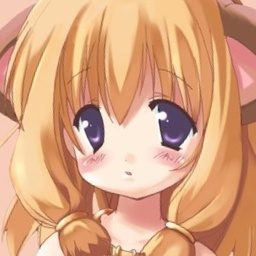

In [104]:
utils.load_img(anime_images[3])

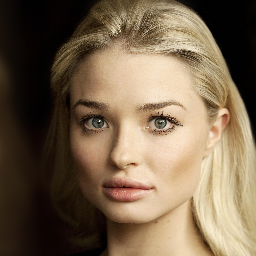

In [105]:
utils.load_img(face_images[3])

(224, 224, 3)


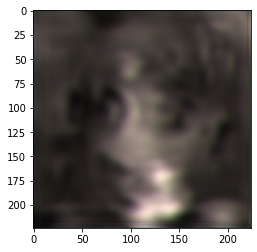

(224, 224, 3)


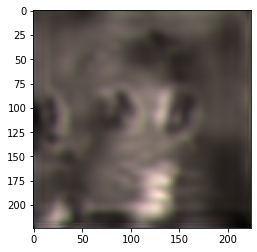

(224, 224, 3)


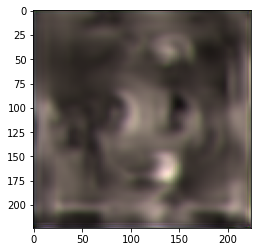

(224, 224, 3)


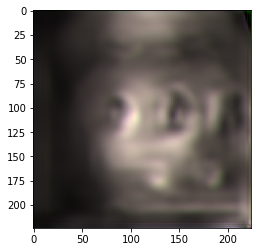

(224, 224, 3)


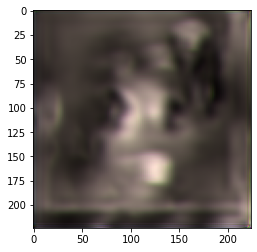

(224, 224, 3)


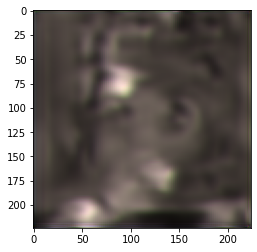

(224, 224, 3)


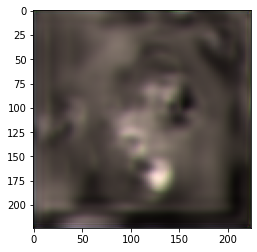

(224, 224, 3)


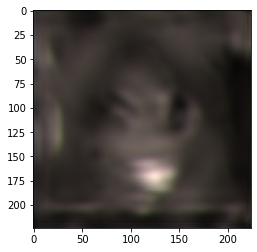

(224, 224, 3)


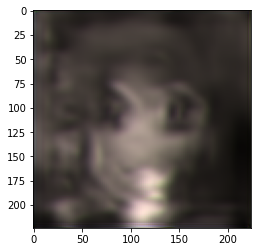

(224, 224, 3)


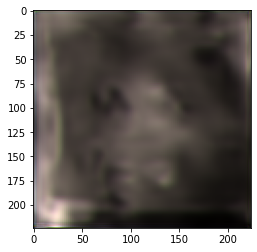

In [106]:
for i in range(10):
    tmp = predictions[i][0]*255.0
    print(tmp.shape)
    img = utils.array_to_img(tmp)
    plt.imshow(img)
    plt.show()